In [ ]:
# Jovac_ML_Assignment Part II

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



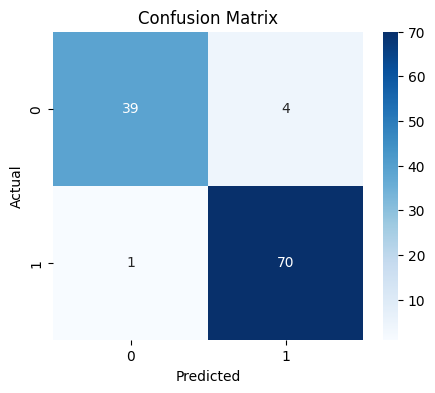

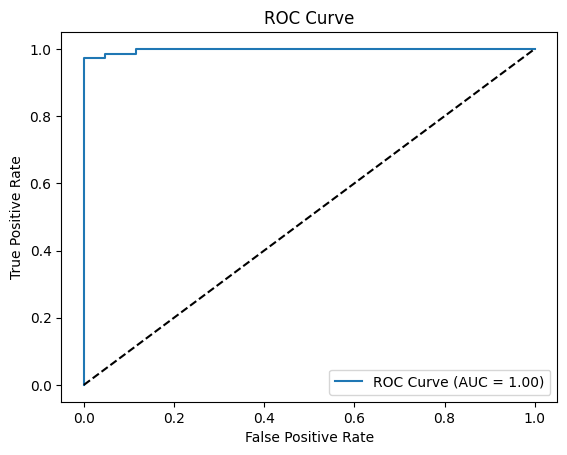

In [ ]:
# TASK 5
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()




=== Threshold Tuning ===

Threshold: 0.3
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1 Score: 0.9655

Threshold: 0.5
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1 Score: 0.9655

Threshold: 0.7
Confusion Matrix:
[[41  2]
 [ 1 70]]
F1 Score: 0.9790


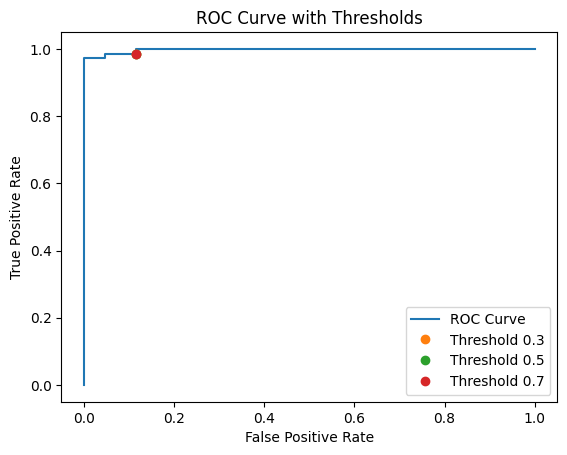

In [6]:
# TASK 6
from sklearn.metrics import f1_score

thresholds_to_check = [0.3, 0.5, 0.7]

print("\n=== Threshold Tuning ===")
for threshold in thresholds_to_check:
    y_custom_pred = (y_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_custom_pred)
    cm = confusion_matrix(y_test, y_custom_pred)
    print(f"\nThreshold: {threshold}")
    print("Confusion Matrix:")
    print(cm)
    print(f"F1 Score: {f1:.4f}")

# Plot ROC with thresholds
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Thresholds")

# Mark some thresholds on the curve
for thresh in [0.3, 0.5, 0.7]:
    index = next(i for i, t in enumerate(thresholds) if t <= thresh)
    plt.plot(fpr[index], tpr[index], 'o', label=f'Threshold {thresh}')

plt.legend()
plt.show()


In [4]:
# TASK 7
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Multiclass logistic regression (one-vs-rest by default)
iris_model = LogisticRegression(max_iter=200)
iris_model.fit(X_iris, y_iris)

# Predict and evaluate
y_iris_pred = iris_model.predict(X_iris)
print("\n Iris Dataset Multiclass Classification Report ")
print(classification_report(y_iris, y_iris_pred, target_names=iris.target_names))



 Iris Dataset Multiclass Classification Report 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

